# LetsGrowMore

## Task 2: 

## B. Prediction Using Decision Tree Algorithm
## Author : Vivek Prakash Upreti (Data Science Intern @ LetsGrowMore)

# Dataset:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view




### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

### Load The Iris Data

In [2]:
iris = pd.read_csv('iris.csv')
iris.describe() #Information About the 'iris' data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
iris.head()  # gives the top 5 row of iris dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.shape

(150, 6)

In [6]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Splitting The Data 

In [8]:
#Split The Data into 'train' and 'test' variable in the percent of 75 and 25 respectively

train,test = train_test_split(iris,test_size=0.25)

## Training Data

In [9]:
train      

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
44,45,5.1,3.8,1.9,0.4,Iris-setosa
138,139,6.0,3.0,4.8,1.8,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
...,...,...,...,...,...,...
143,144,6.8,3.2,5.9,2.3,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor


## Testing Data

In [10]:
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
135,136,7.7,3.0,6.1,2.3,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa


## Again splitting the data for Training Data

In [11]:
# train_X conatins all the features only

train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]


In [12]:
# train_y contain the label 

train_y = train.Species

In [13]:
train_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
44,5.1,3.8,1.9,0.4
138,6.0,3.0,4.8,1.8
5,5.4,3.9,1.7,0.4
109,7.2,3.6,6.1,2.5
89,5.5,2.5,4.0,1.3
...,...,...,...,...
143,6.8,3.2,5.9,2.3
53,5.5,2.3,4.0,1.3
93,5.0,2.3,3.3,1.0
95,5.7,3.0,4.2,1.2


In [14]:
train_y

44         Iris-setosa
138     Iris-virginica
5          Iris-setosa
109     Iris-virginica
89     Iris-versicolor
            ...       
143     Iris-virginica
53     Iris-versicolor
93     Iris-versicolor
95     Iris-versicolor
117     Iris-virginica
Name: Species, Length: 112, dtype: object

## Splitting the same data for Testing Data

In [15]:
## test_X contains the all features
## test_y contain the Label only

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

test_y = test.Species

## Model Making  

### 2 Model By Using Decision Tree Classifier


In [16]:
#Model By Using DecisionTree

model = DecisionTreeClassifier()
model.fit(train_X,train_y)

DecisionTreeClassifier()

## Visualization

[Text(111.60000000000001, 199.32, 'X[3] <= 0.8\ngini = 0.664\nsamples = 112\nvalue = [36, 34, 42]'),
 Text(55.800000000000004, 163.07999999999998, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 4.75\ngini = 0.494\nsamples = 76\nvalue = [0, 34, 42]'),
 Text(111.60000000000001, 126.83999999999999, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.124\nsamples = 45\nvalue = [0, 3, 42]'),
 Text(167.4, 90.6, 'X[1] <= 3.05\ngini = 0.469\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(111.60000000000001, 54.359999999999985, 'X[3] <= 1.65\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(55.800000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(223.20000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(279.0, 90.6, 'gini = 0.0\nsamples = 

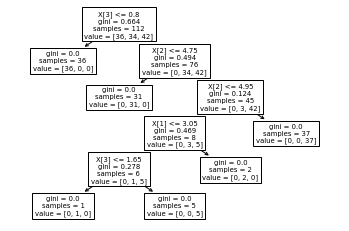

In [17]:
tree.plot_tree(model)

## Prediction By Decision Tree Classifier

In [18]:
# we give the feature in predict variable and they give us the prediction


## Prediction Manually By the user
predict= model.predict([[41,25,32,85]])
print(predict)


['Iris-virginica']


C:\Users\Vivek Prakash Upreti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
## Prediction By the test_X variable in which the testing data is stored
pred =model.predict(test_X)
print(pred)

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa']


### Check The Accuracy

In [20]:
act2 = metrics.accuracy_score(pred,test_y)  # 97% Accuracy By Decision Tree Classifier
print("Test Accuracy By Decision Tree Classifier :- ",(act2*100))

Test Accuracy By Decision Tree Classifier :-  92.10526315789474
